# OPTICS

## Reference

In [ ]:
# https://www.geeksforgeeks.org/ml-optics-clustering-explanation/?ref=lbp

## Import library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [6]:
centers = [(6,1),(-3,9), (0,4)]
X, labels = make_blobs(n_samples= 900, centers= centers, cluster_std=[1,0.7,0.1], random_state= 123)


## Clean dataset

In [32]:
# if false then there are no missing values in dataset
# np.any(np.isnan(X))

# if zero then no missing values
# np.isnan(X).sum()

0

## Normalize the data

In [49]:
std = StandardScaler()
X_normalized = std.fit_transform(X)

## PLot the dataset

<Axes: >

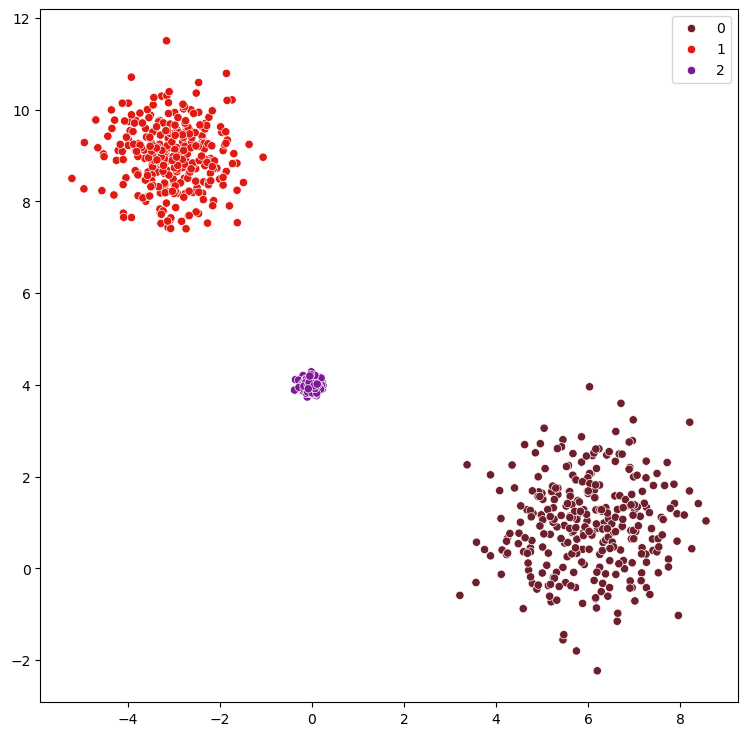

In [41]:
fig, axes = plt.subplots(figsize = (9,9))
palette_list = ['#6e1f2c', '#e01912','#7f1799','#26191e']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, palette = palette_list[0:3])

## OPTICS

<Axes: >

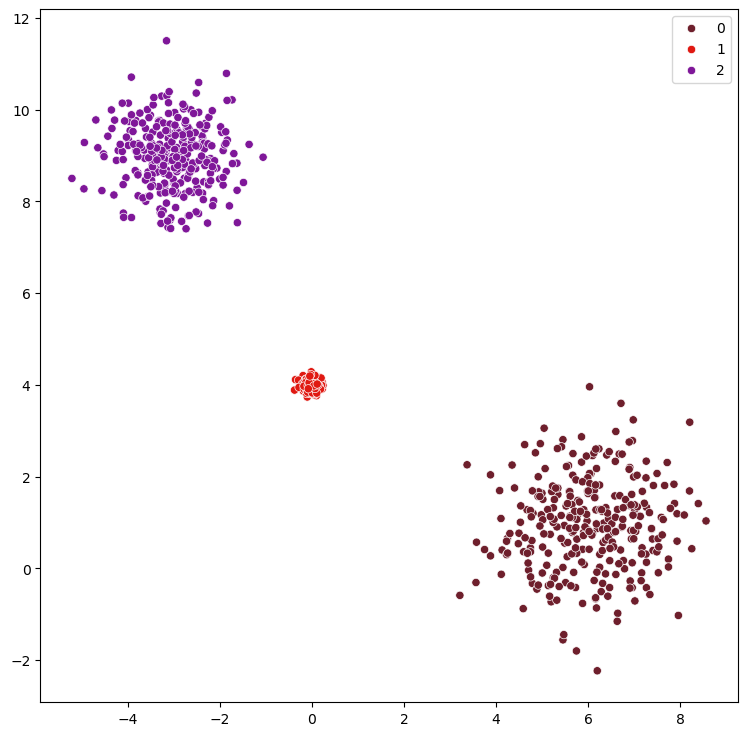

In [198]:
xi = 0.6
# apply optics to cluster 
optics = OPTICS(min_samples = 5, eps = 2, xi = xi)
optics.fit(X = X_normalized)
labs = optics.labels_
# plot the clusters
fig, axes = plt.subplots(figsize = (9,9))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labs, palette = palette_list[0:3])

In [199]:
cluster_labels = optics.labels_
# ii = np.where(cluster_labels == 0)
points = optics.ordering_
reachability_distance = optics.reachability_

In [200]:
df_optics = pd.DataFrame({
  'points': points,
  'clusters': cluster_labels[points],
  'reachability_distance': reachability_distance[points]
})

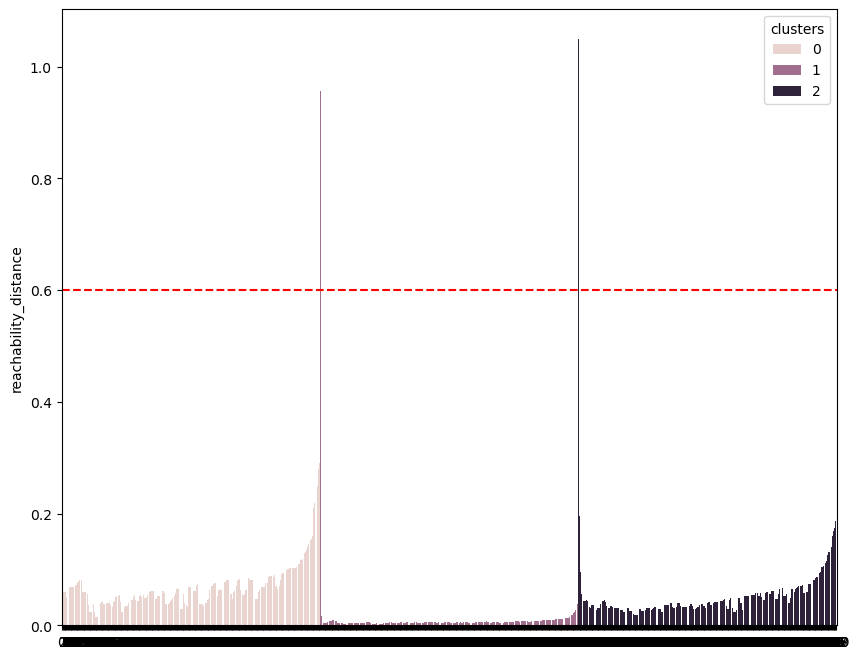

In [201]:
fig, axes = plt.subplots(figsize = (10,8))
sns.barplot(data = df_optics, x = np.arange(0,len(df_optics)), y = 'reachability_distance', hue = 'clusters')
plt.axhline(y = xi, linestyle = '--', color = 'r')
plt.show()